# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows=200
pd.options.display.max_columns=200



# EDA

In [ ]:
data =pd.read_csv('spam.csv')
data.shape

(5572, 2)

In [ ]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: ylabel='count'>

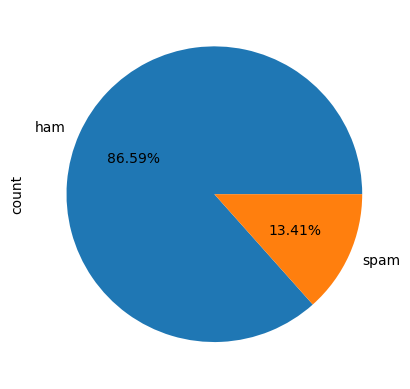

In [ ]:
data['Category'].value_counts().plot(kind='pie',autopct='%1.2f%%')

# Data cleaning

In [ ]:
data['Message'].duplicated().sum()

415

In [ ]:
data.drop_duplicates(keep='first', inplace=True)

# encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lencoder= LabelEncoder()

In [ ]:
data['Category']=lencoder.fit_transform(data['Category'])

In [ ]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# feature engineering

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\osama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\osama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['Message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: Message, Length: 5157, dtype: int64

In [ ]:
data['#char']=data['Message'].apply(len)

In [ ]:
data['#word']=data['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
data['#sentence']=data['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
data.head()

,Category,Message,#char,#word,#sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
data.describe()

,Category,#char,#word,#sentence
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
data['transform_text']=data['Message'].apply(transform_text)

In [ ]:
data.head()

,Category,Message,#char,#word,#sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

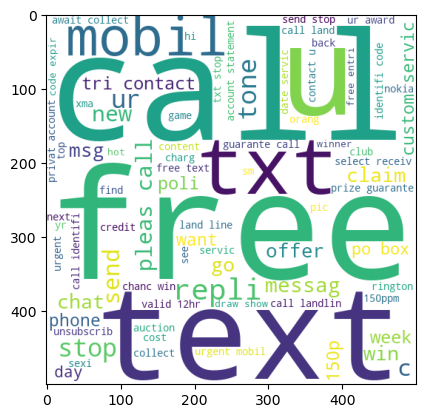

In [ ]:
spam_wc = wc.generate(data[data['Category'] == 1]['transform_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

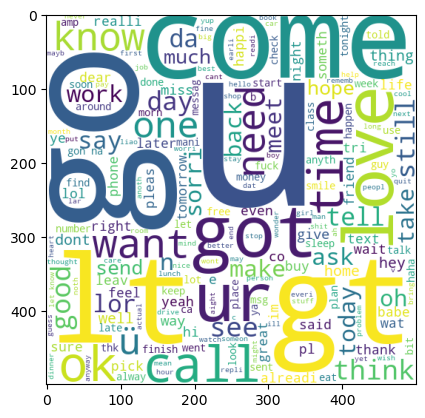

In [ ]:
ham_wc = wc.generate(data[data['Category'] == 0]['transform_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [ ]:
ham_corpus = []
for msg in data[data['Category'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35940

In [ ]:
spam_corpus = []
for msg in data[data['Category'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9781

In [ ]:
# from collections import Counter
# sns.barplot(pd.DataFrame(ham_corpus)mos)

In [ ]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

Text(0.5, 1.0, 'Top 30 Most Common Words in Spam Corpus')

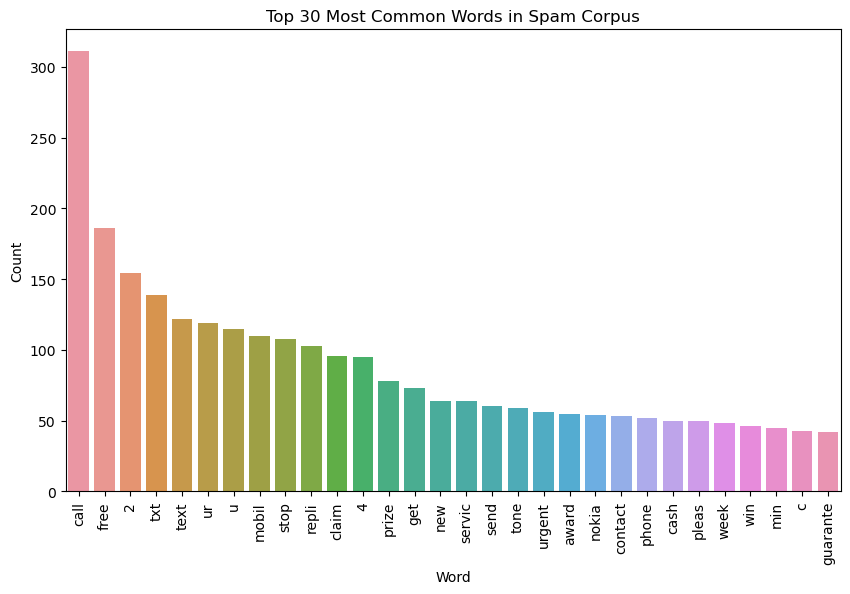

In [ ]:
word_counts = Counter(spam_corpus)
spam_word = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=spam_word, x='Word', y='Count')
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 30 Most Common Words in Spam Corpus')


Text(0.5, 1.0, 'Top 30 Most Common Words in Spam Corpus')

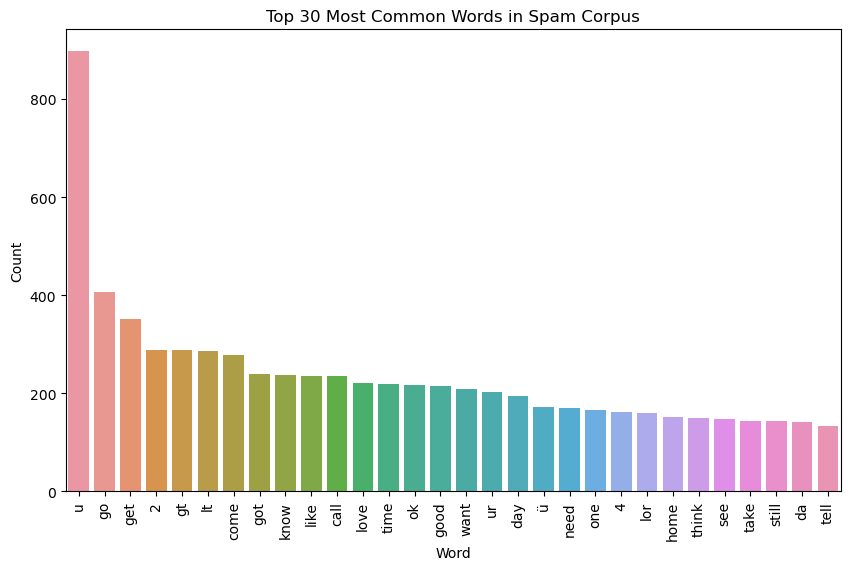

In [ ]:
ham_counts = Counter(ham_corpus)
ham_word = pd.DataFrame(ham_counts.most_common(30), columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=ham_word, x='Word', y='Count')
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 30 Most Common Words in Spam Corpus')


# split data


In [127]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [130]:
X = cv.fit_transform(data['transform_text']).toarray()

y = data['Category']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.35, random_state=42)

# building model


## building classic classification models



In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as clr
import time

### KNN

In [132]:

knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}


In [133]:
knn = KNeighborsClassifier()
rscv_knn = RandomizedSearchCV(knn, param_distributions=knn_params, n_iter=10)


In [134]:
start = time.time()
rscv_knn.fit(X_train, y_train)
end = time.time()
delay = end - start
delay

597.6579554080963

In [135]:
knn_par=rscv_knn.best_params_
knn_par

{'weights': 'distance', 'p': 2, 'n_neighbors': 3, 'algorithm': 'auto'}

In [136]:
rscv_knn.score(X_train, y_train)


1.0

In [137]:
start = time.time()
pred = rscv_knn.predict(X_test)
end = time.time()
delay = end - start
delay

0.5735535621643066

In [ ]:
print(clr(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64      2531
           1       0.64      0.70      0.67      2531

    accuracy                           0.66      5062
   macro avg       0.66      0.66      0.66      5062
weighted avg       0.66      0.66      0.66      5062



### Decision tree

In [138]:
tree_dic={'min_samples_split':[5,6,4,3,2],'min_samples_leaf':[3,10,1,4,5],
          'criterion':['gini','entropy'],'splitter':['best','random']}


In [139]:
tree=DecisionTreeClassifier()

In [140]:
rscv_tree = RandomizedSearchCV(tree, param_distributions=tree_dic, n_iter=10)

In [141]:
start= time.time()
rscv_tree.fit(X_train,y_train)
end= time.time()
delay=end-start
delay

315.4041094779968

In [142]:
tree_par=rscv_tree.best_params_
tree_par

{'splitter': 'random',
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'criterion': 'gini'}

In [143]:
rscv_tree.score(X_train,y_train)

0.9997016706443914

In [144]:
start= time.time()
pred=rscv_tree.predict(X_test)
end= time.time()
delay=end-start
delay

0.03300833702087402

In [145]:
print(clr(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1574
           1       0.85      0.82      0.84       231

    accuracy                           0.96      1805
   macro avg       0.91      0.90      0.91      1805
weighted avg       0.96      0.96      0.96      1805



In [2]:
a=cm(y_test,pred)

NameError: name 'cm' is not defined

In [1]:
print(a)

NameError: name 'a' is not defined

<Axes: >

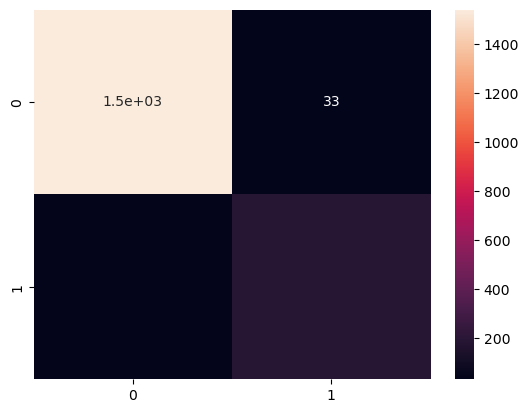

In [147]:
sns.heatmap(a,annot=True)

In [148]:
par=rscv_tree.best_params_
par

{'splitter': 'random',
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'criterion': 'gini'}

### random forest


In [149]:
forest_dic = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

In [150]:
forest=RandomForestClassifier()

In [151]:
rscv_forest = RandomizedSearchCV(forest, param_distributions=forest_dic, n_iter=10)

In [152]:
start= time.time()
rscv_forest.fit(X_train,y_train)
end= time.time()
delay=end-start
delay

C:\Users\osama\anaconda3\envs\vision\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\envs\vision\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\envs\vision\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\osama\anaconda3\envs\vision\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  F

199.84924936294556

In [153]:
forest_par=rscv_forest.best_params_
forest_par

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'entropy',
 'class_weight': 'balanced',
 'bootstrap': True}

In [154]:
rscv_forest.score(X_train,y_train)

0.9797136038186157

In [155]:
start= time.time()
pred=rscv_forest.predict(X_test)
end= time.time()
delay=end-start
delay

0.14800047874450684

In [156]:
print(clr(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1574
           1       0.93      0.88      0.91       231

    accuracy                           0.98      1805
   macro avg       0.96      0.94      0.95      1805
weighted avg       0.98      0.98      0.98      1805



In [157]:
a=cm(y_test,pred)

<Axes: >

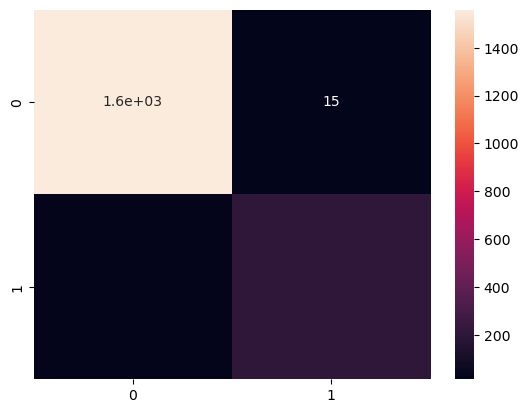

In [158]:
sns.heatmap(a,annot=True)

### Naive Bayes

In [159]:
gnb_params = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5]]
}

In [160]:
nb=GaussianNB()

In [161]:
rscv_nb = RandomizedSearchCV(nb, param_distributions=gnb_params, n_iter=10)

In [162]:
start= time.time()
rscv_nb.fit(X_train,y_train)
end= time.time()
delay=end-start
delay

C:\Users\osama\anaconda3\envs\vision\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


5.501487493515015

In [163]:
nb_par=rscv_nb.best_params_
nb_par

{'priors': None}

In [164]:
rscv_nb.score(X_train,y_train)

0.9248210023866349

In [165]:
start= time.time()
pred=rscv_nb.predict(X_test)
end= time.time()
delay=end-start
delay

0.19399452209472656

In [166]:
print(clr(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1574
           1       0.52      0.90      0.66       231

    accuracy                           0.88      1805
   macro avg       0.75      0.89      0.79      1805
weighted avg       0.92      0.88      0.89      1805



In [167]:
a=cm(y_test,pred)

<Axes: >

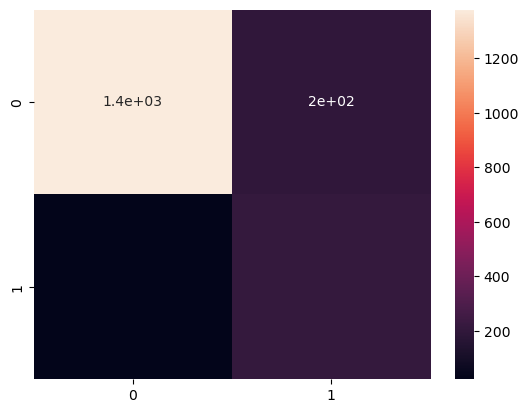

In [168]:
sns.heatmap(a,annot=True)

### SVM

In [169]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

In [170]:
svc=SVC()

In [171]:
rscv_svc = RandomizedSearchCV(svc, param_distributions=svm_params, n_iter=10)

In [172]:
start= time.time()
rscv_svc.fit(X_train,y_train)
end= time.time()
delay=end-start
delay

541.278650522232

In [173]:
svc_par=rscv_svc.best_params_
svc_par

{'kernel': 'linear',
 'gamma': 'auto',
 'degree': 2,
 'class_weight': 'balanced',
 'C': 1}

In [174]:
rscv_svc.score(X_train,y_train)

1.0

In [175]:
start= time.time()
pred=rscv_nb.predict(X_test)
end= time.time()
delay=end-start
delay

0.20104074478149414

In [176]:
print(clr(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1574
           1       0.52      0.90      0.66       231

    accuracy                           0.88      1805
   macro avg       0.75      0.89      0.79      1805
weighted avg       0.92      0.88      0.89      1805



In [177]:
a=cm(y_test,pred)

<Axes: >

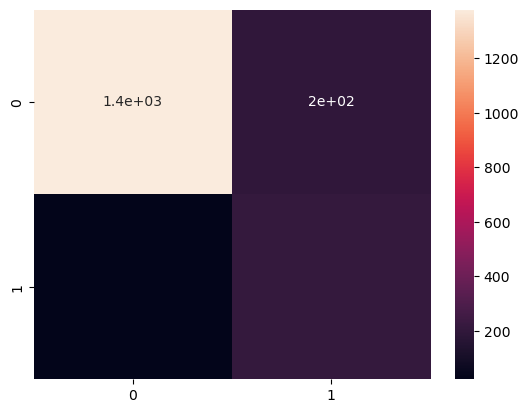

In [178]:
sns.heatmap(a,annot=True)

### Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
logistic_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

In [181]:
lr=LogisticRegression()

In [182]:
rscv_lr = RandomizedSearchCV(lr, param_distributions=logistic_params, n_iter=10)

In [183]:
start= time.time()
rscv_lr.fit(X_train,y_train)
end= time.time()
delay=end-start
delay

C:\Users\osama\anaconda3\envs\vision\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\osama\anaconda3\envs\vision\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\osama\anaconda3\envs\vision\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\osama\anaconda3\envs\vision\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\osama\anaconda3\envs\vision\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\osama\anaconda3\envs\vision\lib\site-pack

317.84922909736633

In [184]:
lr_par=rscv_lr.best_params_
lr_par

{'solver': 'saga',
 'penalty': 'l2',
 'max_iter': 300,
 'class_weight': 'balanced',
 'C': 10}

In [185]:
rscv_lr.score(X_train,y_train)

1.0

In [186]:
start= time.time()
pred=rscv_nb.predict(X_test)
end= time.time()
delay=end-start
delay

0.2155132293701172

In [187]:
print(clr(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1574
           1       0.52      0.90      0.66       231

    accuracy                           0.88      1805
   macro avg       0.75      0.89      0.79      1805
weighted avg       0.92      0.88      0.89      1805



In [188]:
a=cm(y_test,pred)

<Axes: >

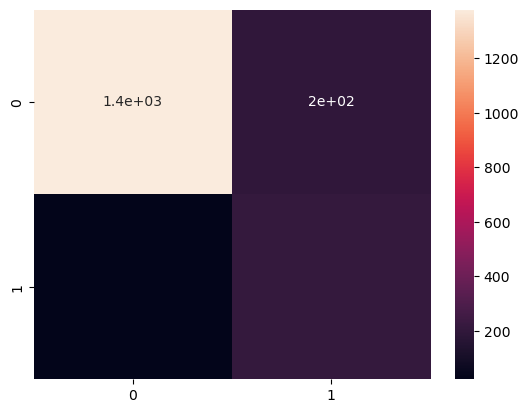

In [189]:
sns.heatmap(a,annot=True)

# deep learning: neural network

In [190]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [192]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  
])

In [193]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [194]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
95/95 [==============================] - 4s 35ms/step - loss: 0.3712 - accuracy: 0.8700 - val_loss: 0.1733 - val_accuracy: 0.9196
Epoch 2/50
95/95 [==============================] - 3s 27ms/step - loss: 0.1142 - accuracy: 0.9665 - val_loss: 0.0798 - val_accuracy: 0.9792
Epoch 3/50
95/95 [==============================] - 2s 23ms/step - loss: 0.0436 - accuracy: 0.9901 - val_loss: 0.0769 - val_accuracy: 0.9792
Epoch 4/50
95/95 [==============================] - 2s 25ms/step - loss: 0.0222 - accuracy: 0.9940 - val_loss: 0.0957 - val_accuracy: 0.9792
Epoch 5/50
95/95 [==============================] - 3s 36ms/step - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.0958 - val_accuracy: 0.9792
Epoch 6/50
95/95 [==============================] - 3s 35ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.1130 - val_accuracy: 0.9792
Epoch 7/50
95/95 [==============================] - 2s 23ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.1205 - val_accuracy: 0.9792
Epoch 8/50
95

In [195]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

In [196]:
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.9850415587425232
